# Part 1 - Common Analysis - Toledo	OH

### Lay Yang
### Email:layyang@uw.edu

This notebook provide analysis for Part 1 - Common Analysis. It sets the stage for the subsequent assignments. In Part 1 conducts a base analysis for the city of Toledo OH. This dataset was collected and aggregated by the US Geological Survey. The dataset is relatively well documented. The dataset provides fire polygons in ArcGIS and GeoJSON formats. 

The main purpose of the common analysis is find out what the estimated wildfire smoke impacts are for the city of Toledo OH each year for the most recent 60 years of wildfire data.

### Preliminaries
First starting with some imports and some constant definitions.

In [5]:
#install geojson

!pip install geojson

In [1]:
#
#    IMPORTS
# 

#    Import some standard python modules
import os, json, time
#
#    The module pyproj is a standard module that can be installed using pip or your other favorite
#    installation tool. This module provides tools to convert between different geodesic coordinate systems
#    and for calculating distances between points (coordinates) in a specific geodesic system.
#
from pyproj import Transformer, Geod
#
#    The 'wildfire' module is a user module. This module is available from the course website. The module
#    includes one object, a Reader, that can be used to read the GeoJSON files associated with the
#    wildefire dataset. The module also contains a sample datafile that is GeoJSON compliant and that
#    contains a small number of wildfires extracted from the main wildfire dataset.
#    
from wildfire.Reader import Reader as WFReader
#
#    There is a GeoJSON reader that you might try if you wanted to read the data. It has its own quirks.
#    There will be an example below that reads the sample file "Wildfire_short_sample.json"
#    
import geojson
#

In [2]:
#
#    CONSTANTS
#

#
#    The 'Wildfire_short_sample_2024.json' is an extraction from the full 'USGS_Wildland_Fire_Combined_Dataset.json'
#    dataset extracting several major wildfires in California, plus a couple others that have interested data structure
#    features. 
#
#    The sample file includes data for 15 fires, mostly oriented around the uniqueness of the name. Naming conventions
#    for wildfires is really adhoc, which makes finding any named fire in the dataset a disambiguation mess. The named
#    fires were selected from https://en.wikipedia.org/wiki/List_of_California_wildfires
#
#    The point nof the sample is to provide something small to test with before committing to processing the, much 
#    larger, full dataset.
#
EXTRACT_FILENAME = "Wildfire_short_sample_2024.json"
#
#    The user module 'wildfire' contains a Reader object and the sample data. This bit of code finds where that is
#    located on your machine and constructs a path so that the sample data can be loaded. This assumes you have set 
#    a PYTHONPATH environment variable to point to the location on your machine where you store python user modules.
#
#    NOTE: if you use Anaconda for virtual python environments, Anaconda will adhere to the PYTHONPATH conventions
#    for user modules.
#
MODULENAME = "wildfire"
MODULEPATH = ""
    # try:
    #     ppath = os.environ.get('PYTHONPATH')
    #     if not ppath: raise
    #     MODULEPATH = os.path.join(ppath,MODULENAME)
    # except:
    #     # Likely here because a PYTHONPATH was not set, show a warning message
    #     print("Looks like you're not using a 'PYTHONPATH' to specify the location of your python user modules.")
    #     print("You may have to modify the sample code in this notebook to get the documented behaviors.")
    #     MODULEPATH = ""

    # if MODULEPATH:
    #     SAMPLE_DATA_FILENAME = os.path.join(MODULEPATH,EXTRACT_FILENAME)
    # else:
    #     SAMPLE_DATA_FILENAME = EXTRACT_FILENAME
#

MODULEPATH = "wildfire"  
SAMPLE_DATA_FILENAME = os.path.join(MODULEPATH, EXTRACT_FILENAME)

# print out where we think we're going to find the sample data
print(f"{SAMPLE_DATA_FILENAME=}")

#
#    A dictionary of some city locations from the US west coast states.
#
CITY_LOCATIONS = {
    'anchorage' :     {'city'   : 'Anchorage',
                       'latlon' : [61.2176, -149.8997] },
    'ocean_shores' :  {'city'   : 'Ocean Shores',    
                       'latlon' : [47.0074, -124.1614] },
    'seaside' :       {'city'   : 'Seaside',
                       'latlon' : [45.9932, -123.9226] }, 
    'bend' :          {'city'   : 'Bend',
                       'latlon' : [44.0582, -121.3153] }, 
    'medford' :       {'city'   : 'Medford',
                       'latlon' : [42.3265, -122.8756] }, 
    'crescent_city' : {'city'   : 'Crescent City',
                       'latlon' : [41.7558, -124.2026] }, 
    'tomales' :       {'city'   : 'Tomales',
                       'latlon' : [38.2411, -122.9033] }, 
    'barstow' :       {'city'   : 'Barstow',
                       'latlon' : [34.8958, -117.0173] }, 
    'redding' :       {'city'   : 'Redding',
                       'latlon' : [40.5865, -122.3916] }, 
    'encinitas' :     {'city'   : 'Encinitas',
                       'latlon' : [33.0370, -117.2920] },
    'loveland' :      {'city'   : 'Loveland',
                       'latlon' : [40.398857, -105.052643] }
}


SAMPLE_DATA_FILENAME='wildfire\\Wildfire_short_sample_2024.json'


### Load the wildfire data using the GeoJSON module
Load the wildfire data using the GeoJSON module (documentation, GitHub repo). GeoJSON is mostly just JSON, and will do some conversion of Geo type things to something useful.

In [3]:
#
#    Open a file, load it with the geojson loader
#
print(f"Attempting to open '{SAMPLE_DATA_FILENAME}'")
geojson_file = open(SAMPLE_DATA_FILENAME,"r")
print(f"Using GeoJSON module to load sample file '{SAMPLE_DATA_FILENAME}'")
gj_data = geojson.load(geojson_file)
geojson_file.close()
#
#    Print the keys from the object
#
gj_keys = list(gj_data.keys())
print("The loaded JSON dictionary has the following keys:")
print(gj_keys)
print()
#
#    For all GeoJSON type things, the most important part of the file are the 'features'. 
#    In the case of the wildfire dataset, each feature is a polygon (ring) of points that define the bounary of a fire
#
count = 0
for feature in gj_data['features']:
    count += 1
    #print(json.dumps(feature,indent=4))
    time.sleep(0.5)   # this slows the output to fix output rate limits for Jupyter

print(f"Found {count} features in the variable 'gj_data' ")
#

Attempting to open 'wildfire\Wildfire_short_sample_2024.json'
Using GeoJSON module to load sample file 'wildfire\Wildfire_short_sample_2024.json'
The loaded JSON dictionary has the following keys:
['displayFieldName', 'fieldAliases', 'geometryType', 'spatialReference', 'fields', 'features']

Found 15 features in the variable 'gj_data' 


In [4]:
#
#    Get the first item in the list of features
#
SLOT = 0
gj_feature = gj_data['features'][SLOT]
#
#    Print everyting in this dictionary (i.e., gj_feature) - it's long
#
print(f"The wildfire feature from slot '{SLOT}' of the loaded gj_data['features']")
print(json.dumps(gj_feature, indent=4))


The wildfire feature from slot '0' of the loaded gj_data['features']
{
    "attributes": {
        "OBJECTID": 4956,
        "USGS_Assigned_ID": 4956,
        "Assigned_Fire_Type": "Wildfire",
        "Fire_Year": 1932,
        "Fire_Polygon_Tier": 1,
        "Fire_Attribute_Tiers": "1 (1), 3 (3)",
        "GIS_Acres": 219999.23754748085,
        "GIS_Hectares": 89030.53273921262,
        "Source_Datasets": "Comb_National_NIFC_Interagency_Fire_Perimeter_History (1), Comb_National_USFS_Final_Fire_Perimeter (1), Comb_National_WFDSS_Interagency_Fire_Perimeter_History (1), Comb_State_California_Wildfire_Polygons (1)",
        "Listed_Fire_Types": "Wildfire (3), Likely Wildfire (1)",
        "Listed_Fire_Names": "MATILIJA (4)",
        "Listed_Fire_Codes": "No code provided (4)",
        "Listed_Fire_IDs": "0 (3)",
        "Listed_Fire_IRWIN_IDs": "",
        "Listed_Fire_Dates": "Listed Wildfire Discovery Date(s): 1932-09-07 (2) | Listed Other Fire Date(s): 1899-12-30 - REVDATE field (1), 

In [5]:
#    Every feature has a 'geometry' which specifies geo coordinates that make up each geographic thing
#    In the case of the wildfire data, most wildfires are bounded shapes, circles, squares, etc. This is
#    represented by shapes called 'rings' in GeoJSON.
# 
# Get the geometry for the feature we pulled from the feature_list
gj_geometry = gj_feature['geometry']
# The largest shape (ring) is supposed to be item zero in the list of 'rings'
gj_bigest_ring = gj_geometry['rings'][0]

print(f"The largest ring of gj_feature['features'][{SLOT}]['rings'] consists of {len(gj_bigest_ring)} points.")

The largest ring of gj_feature['features'][0]['rings'] consists of 1132 points.


### Load the wildfire data using the wildfire Reader object
We load the wildfire data using the wildfire Reader object following example 2.

In [6]:
#
#    This bit of code opens a new wildfire reader, gets the header information and prints it to the screen
#
print(f"Attempting to open '{SAMPLE_DATA_FILENAME}' with wildfire.Reader() object")
wfreader = WFReader(SAMPLE_DATA_FILENAME)
print()
#
#    Now print the header - it contains some useful information
#
header_dict = wfreader.header()
header_keys = list(header_dict.keys())
print("The header has the following keys:")
print(gj_keys)
print()
print("Header Dictionary")
print(json.dumps(header_dict,indent=4))


Attempting to open 'wildfire\Wildfire_short_sample_2024.json' with wildfire.Reader() object

The header has the following keys:
['displayFieldName', 'fieldAliases', 'geometryType', 'spatialReference', 'fields', 'features']

Header Dictionary
{
    "displayFieldName": "",
    "fieldAliases": {
        "OBJECTID": "OBJECTID",
        "USGS_Assigned_ID": "USGS Assigned ID",
        "Assigned_Fire_Type": "Assigned Fire Type",
        "Fire_Year": "Fire Year",
        "Fire_Polygon_Tier": "Fire Polygon Tier",
        "Fire_Attribute_Tiers": "Fire Attribute Tiers",
        "GIS_Acres": "GIS_Acres",
        "GIS_Hectares": "GIS_Hectares",
        "Source_Datasets": "Source Datasets",
        "Listed_Fire_Types": "Listed Fire Types",
        "Listed_Fire_Names": "Listed Fire Names",
        "Listed_Fire_Codes": "Listed Fire Codes",
        "Listed_Fire_IDs": "Listed Fire IDs",
        "Listed_Fire_IRWIN_IDs": "Listed Fire IRWIN IDs",
        "Listed_Fire_Dates": "Listed Fire Dates",
        "L

In [7]:
#
#    This sample code will load the whole sample (extracted data) file, or a small amount of the complete dataset.
#
MAX_FEATURE_LOAD = 100
feature_list = list()
feature_count = 0
# A rewind() on the reader object makes sure we're at the start of the feature list
# This way, we can execute this cell multiple times and get the same result 
wfreader.rewind()
# Now, read through each of the features, saving them as dictionaries into a list
feature = wfreader.next()
while feature:
    feature_list.append(feature)
    feature_count += 1
    # if we're loading a lot of features, print progress
    if (feature_count % 100) == 0:
        print(f"Loaded {feature_count} features")
    # loaded the max we're allowed then break
    if feature_count >= MAX_FEATURE_LOAD:
        break
    feature = wfreader.next()
#
#    Print the number of items (features) we think we loaded
print(f"Loaded a total of {feature_count} features")
#
#    Just a validation check - did all the items we loaded get into the list?
print(f"Variable 'feature_list' contains {len(feature_list)} features")




Loaded a total of 15 features
Variable 'feature_list' contains 15 features


In [8]:
#
#    The 'feature_list' variable was created when we read the sample file in a code cell above
#    Now, we're just going to look at one single feature - see what is in there
#
SLOT = 0
wf_feature = feature_list[SLOT]

# Print everyting in this dictionary (i.e., wf_feature) - it's long
print(f"The wildfire feature from slot '{SLOT}' of the loaded 'feature_list'")
print(json.dumps(wf_feature, indent=4))


The wildfire feature from slot '0' of the loaded 'feature_list'
{
    "attributes": {
        "OBJECTID": 4956,
        "USGS_Assigned_ID": 4956,
        "Assigned_Fire_Type": "Wildfire",
        "Fire_Year": 1932,
        "Fire_Polygon_Tier": 1,
        "Fire_Attribute_Tiers": "1 (1), 3 (3)",
        "GIS_Acres": 219999.23754748085,
        "GIS_Hectares": 89030.53273921262,
        "Source_Datasets": "Comb_National_NIFC_Interagency_Fire_Perimeter_History (1), Comb_National_USFS_Final_Fire_Perimeter (1), Comb_National_WFDSS_Interagency_Fire_Perimeter_History (1), Comb_State_California_Wildfire_Polygons (1)",
        "Listed_Fire_Types": "Wildfire (3), Likely Wildfire (1)",
        "Listed_Fire_Names": "MATILIJA (4)",
        "Listed_Fire_Codes": "No code provided (4)",
        "Listed_Fire_IDs": "0 (3)",
        "Listed_Fire_IRWIN_IDs": "",
        "Listed_Fire_Dates": "Listed Wildfire Discovery Date(s): 1932-09-07 (2) | Listed Other Fire Date(s): 1899-12-30 - REVDATE field (1), 1932-

In [9]:
#
#    Every feature has a 'geometry' which specifies geo coordinates that make up each geographic thing
#    In the case of the wildfire data, most wildfires are bounded shapes, circles, squares, etc. This is
#    represented by shapes called 'rings' in GeoJSON.
# 
# Get the geometry for the feature we pulled from the feature_list
wf_geometry = wf_feature['geometry']
# The largest shape (ring) is supposed to be item zero in the list of 'rings'
wf_bigest_ring = wf_geometry['rings'][0]

print(f"The largest ring of wf_feature['features'][{SLOT}]['rings'] consists of {len(wf_bigest_ring)} points.")

The largest ring of wf_feature['features'][0]['rings'] consists of 1132 points.


In [10]:
#
#    First create a geodesic model that will be used for the calculations. There are a number of
#    different models of the earth. The WSG84 is one that is commonly used and relatively up-to-date
#
#geodcalc = Geod(ellps='clrk66')       # Use Clarke 1866 ellipsoid representation of the earth
geodcalc = Geod(ellps='WGS84')         # Use WGS84 ellipsoid representation of the earth

#    Two constants for accessing the 'latlon' array in our CITY_LOCATIONS constant dict
LAT = 0
LON = 1
#    Get a city from our CITY_LOCATIONS constant as our starting position
start_at = CITY_LOCATIONS["medford"]
start_at = CITY_LOCATIONS["redding"]
start_at = CITY_LOCATIONS["loveland"]

#    Loop through all of the cities to calculate the distance from the starting position
for city_key in CITY_LOCATIONS.keys():
    #    City destination
    destination = CITY_LOCATIONS[city_key]
    #    Note that the 'inv()' function wants coordinates in Longitude,Latitude order by default
    #    inv() also allows lat and lon parameters to be vectors/arrays - in which case the results would be vector/arrarys
    distance = geodcalc.inv(start_at['latlon'][LON],start_at['latlon'][LAT],destination['latlon'][LON],destination['latlon'][LAT])
    #    The 'distance' result variable is a tuple/list with the first two items reflecting forward/backward azimuths
    #    and the third item representing the distance in meters. 
    d_meters = distance[2]
    d_miles = d_meters * 0.00062137 # constant to convert meters to miles
    #    BTW, this isn't actually a 'straight' line because the whole reason for using pyproj is to calculate
    #    these distance measures over the surface of a sphere/ellipsoid. We set up which ellipsoid to use when we
    #    defined the 'geodcalc' object near the top of this cell
    print(f"Straight line distance from {start_at['city']} to {destination['city']} is {d_meters} meters or {d_miles:5.2f} miles")



Straight line distance from Loveland to Anchorage is 3800330.9337880667 meters or 2361.41 miles
Straight line distance from Loveland to Ocean Shores is 1700334.6351250922 meters or 1056.54 miles
Straight line distance from Loveland to Seaside is 1649822.3613664228 meters or 1025.15 miles
Straight line distance from Loveland to Bend is 1400008.5319638762 meters or 869.92 miles
Straight line distance from Loveland to Medford is 1503732.3001080342 meters or 934.37 miles
Straight line distance from Loveland to Crescent City is 1612979.0529373726 meters or 1002.26 miles
Straight line distance from Loveland to Tomales is 1555123.165847217 meters or 966.31 miles
Straight line distance from Loveland to Barstow is 1218224.6806120283 meters or 756.97 miles
Straight line distance from Loveland to Redding is 1467713.6260297257 meters or 911.99 miles
Straight line distance from Loveland to Encinitas is 1362736.6411465148 meters or 846.76 miles
Straight line distance from Loveland to Loveland is 0.0

### Load data for the city of Toledo, OH

The latitude and longtitude is 41.66°N 83.58°W (41.736980 and -111.833839, respectively).

In [11]:
#Input Toledo location info
CITY_LOCATIONS['Toledo'] = {
    'city': 'Toledo',
    'latlon': [41.66, -83.58]
}

In [12]:
#
#    Transform feature geometry data
#
#    The function takes one parameter, a list of ESRI:102008 coordinates that will be transformed to EPSG:4326
#    The function returns a list of coordinates in EPSG:4326
def convert_ring_to_epsg4326(ring_data=None):
    converted_ring = list()
    #
    # We use a pyproj transformer that converts from ESRI:102008 to EPSG:4326 to transform the list of coordinates
    to_epsg4326 = Transformer.from_crs("ESRI:102008","EPSG:4326")
    # We'll run through the list transforming each ESRI:102008 x,y coordinate into a decimal degree lat,lon
    for coord in ring_data:
        lat,lon = to_epsg4326.transform(coord[0],coord[1])
        new_coord = lat,lon
        converted_ring.append(new_coord)
    return converted_ring

In [13]:
#
#   Convert one ring from the default to EPSG
#
#   There are two options here - depending upon whether you loaded data useing GeoJSON or the wildfire.Reader
#
# ring_in_epsg4326 = convert_ring_to_epsg4326(gj_bigest_ring)
#
ring_in_epsg4326 = convert_ring_to_epsg4326(wf_bigest_ring)
#
print(f"Ring consists of {len(ring_in_epsg4326)} points.")
#
#    If you want to print them out you can see what they look like converted.
#print(ring_in_epsg4326)
#for point in ring_in_epsg4326:
#    print(f"{point[0]},{point[1]}")


Ring consists of 1132 points.


### Compute distance between a place and a wildfire

This step calculate how far away a fire is from some location (Toledo, OH)

1. The first bit of code finds the point on the perimiter with the shortest distance to the city (place) and returns the distance as well as the lat,lon of the perimeter point.

2. The second bit of code calculates the average distance of all perimeter points to the city (place) and returns that average as the distance. This is not quite what the centroid would be, but it is probably fairly close.

These are two reasonable ways to think about possible distance to a fire. But both require computing distance to a whole set of points on the perimeter of a fire.

In [14]:
#    
#    The function takes two parameters
#        A place - which is coordinate point (list or tuple with two items, (lat,lon) in decimal degrees EPSG:4326
#        Ring_data - a list of decimal degree coordinates for the fire boundary
#
#    The function returns a list containing the shortest distance to the perimeter and the point where that is
#
def shortest_distance_from_place_to_fire_perimeter(place=None,ring_data=None):
    # convert the ring data to the right coordinate system
    ring = convert_ring_to_epsg4326(ring_data)    
    # create a epsg4326 compliant object - which is what the WGS84 ellipsoid is
    geodcalc = Geod(ellps='WGS84')
    closest_point = list()
    # run through each point in the converted ring data
    for point in ring:
        # calculate the distance
        d = geodcalc.inv(place[1],place[0],point[1],point[0])
        # convert the distance to miles
        distance_in_miles = d[2]*0.00062137
        # if it's closer to the city than the point we have, save it
        if not closest_point:
            closest_point.append(distance_in_miles)
            closest_point.append(point)
        elif closest_point and closest_point[0]>distance_in_miles:
            closest_point = list()
            closest_point.append(distance_in_miles)
            closest_point.append(point)
    return closest_point


In [15]:
#
#    The function takes two parameters
#        A place - which is coordinate point (list or tuple with two items, (lat,lon) in decimal degrees EPSG:4326
#        Ring_data - a list of decimal degree coordinates for the fire boundary
#
#    The function returns the average miles from boundary to the place
#
def average_distance_from_place_to_fire_perimeter(place=None,ring_data=None):
    # convert the ring data to the right coordinate system
    ring = convert_ring_to_epsg4326(ring_data)    
    # create a epsg4326 compliant object - which is what the WGS84 ellipsoid is
    geodcalc = Geod(ellps='WGS84')
    # create a list to store our results
    distances_in_meters = list()
    # run through each point in the converted ring data
    for point in ring:
        # calculate the distance
        d = geodcalc.inv(place[1],place[0],point[1],point[0])
        distances_in_meters.append(d[2])
    #print("Got the following list:",distances_in_meters)
    # convert meters to miles
    distances_in_miles = [meters*0.00062137 for meters in distances_in_meters]
    # the esri polygon shape (the ring) requires that the first and last coordinates be identical to 'close the region
    # we remove one of them so that we don't bias our average by having two of the same point
    distances_in_miles_no_dup = distances_in_miles[1:]
    # now, average miles
    average = sum(distances_in_miles_no_dup)/len(distances_in_miles_no_dup)
    return average


In [17]:
#    Get a city from our CITY_LOCATIONS constant as our starting position

place = CITY_LOCATIONS["Toledo"]

for wf_feature in feature_list:
    #print(f"{place['city']}")
    wf_year = wf_feature['attributes']['Fire_Year']
    wf_name = wf_feature['attributes']['Listed_Fire_Names'].split(',')[0]
    wf_size = wf_feature['attributes']['GIS_Acres']
    wf_type = wf_feature['attributes']['Assigned_Fire_Type']
    if 'rings' in wf_feature['geometry']:
        ring_data = wf_feature['geometry']['rings'][0]
    elif 'curveRings' in wf_feature['geometry']:
        ring_data = wf_feature['geometry']['curveRings'][0]
    else:
        raise Exception("HEY! No compatible geometry in this fire data!!!")
    #
    #     Compute using the shortest distance to any point on the perimeter
    #
    distance = shortest_distance_from_place_to_fire_perimeter(place['latlon'],ring_data)
    print(f"The closest distance of fire '{wf_name}' ({wf_size:1.2f} acres) from {wf_year} was {distance[0]:1.2f} miles to {place['city']}")
    print(f"\tThe cloest perimiter point lat,lon {distance[1][0]},{distance[1][1]}")
    #
    #     Compute using the average distance to all points on the perimeter
    #
    distance = average_distance_from_place_to_fire_perimeter(place['latlon'],ring_data)
    print(f"Fire '{wf_name}' ({wf_size:1.2f} acres) from {wf_year} was an average {distance:1.2f} miles to {place['city']}")
    # just get a location to print thats on the ring (perimeter)
    ring = convert_ring_to_epsg4326(ring_data)
    perimeter_start = ring[0]
    print(f"\tOne perimiter point lat,lon {perimeter_start[0]},{perimeter_start[1]}")
    print()
    print()


The closest distance of fire 'MATILIJA (4)' (219999.24 acres) from 1932 was 1970.52 miles to Toledo
	The cloest perimiter point lat,lon 34.575810382121965,-118.89675316374645
Fire 'MATILIJA (4)' (219999.24 acres) from 1932 was an average 1989.09 miles to Toledo
	One perimiter point lat,lon 34.63154707144714,-119.30481002793371


The closest distance of fire 'CEDAR (6)' (271157.85 acres) from 2003 was 1920.74 miles to Toledo
	The cloest perimiter point lat,lon 32.78574948113319,-116.86057686693253
Fire 'CEDAR (6)' (271157.85 acres) from 2003 was an average 1920.84 miles to Toledo
	One perimiter point lat,lon 32.78722501562976,-116.86172970769886


The closest distance of fire 'CEDAR MOUNTAIN (4)' (29.36 acres) from 2003 was 1736.28 miles to Toledo
	The cloest perimiter point lat,lon 43.29863763025868,-117.72931658019955
Fire 'CEDAR MOUNTAIN (4)' (29.36 acres) from 2003 was an average 1736.50 miles to Toledo
	One perimiter point lat,lon 43.2972570695969,-117.73172491037836


The closest 

In [19]:
import pandas as pd

In [22]:
# Load JSON data from the file
with open('wildfire/USGS_Wildland_Fire_Combined_Dataset.json', 'r') as file:
    wildfire_data = json.load(file)

# Convert JSON file to dataframe
df_wildfires = pd.json_normalize(wildfire_data['features'], sep='_')

In [23]:
#Select wildfires between the year of 1961 and 2021
df_years = df_wildfires[(df_wildfires['attributes_Fire_Year'] >= 1961) & (df_wildfires['attributes_Fire_Year'] <= 2021)]

In [24]:
print(df_years[['attributes_Listed_Fire_Dates']].head(10).to_string())

                                                                                                                                                                          attributes_Listed_Fire_Dates
13525                                                   Listed Wildfire Discovery Date(s): 1961-09-08 (4) | Listed Other Fire Date(s): 1899-12-30 - REVDATE field (2), 1961-09-08 - DATE_CUR field (2)
13526  Listed Wildfire Discovery Date(s): 1961-07-10 (2), 1961-08-08 (2) | Listed Other Fire Date(s): 1899-12-30 - REVDATE field (2), 1961-07-10 - DATE_CUR field (1), 1961-08-08 - DATE_CUR field (1)
13527                                                   Listed Wildfire Discovery Date(s): 1961-09-02 (4) | Listed Other Fire Date(s): 1899-12-30 - REVDATE field (2), 1961-09-02 - DATE_CUR field (2)
13528                                                   Listed Wildfire Discovery Date(s): 1961-07-12 (2) | Listed Other Fire Date(s): 1961-07-12 - DATE_CUR field (1), 1899-12-30 - REVDATE field (1)
13529

In [25]:
import re

# Define a function to extract and filter fire season dates
def filter_annual_fire_season(row):
    row = str(row)
    listed_dates = re.findall(r'Listed Wildfire Discovery Date\(s\): ([^|]*)', row)
    
    if listed_dates:
        dates = re.findall(r'\d{4}-\d{2}-\d{2}', listed_dates[0])
        return [date for date in dates if '-05-01' <= date[-6:] <= '-10-31']
    return []

# Apply function to the DataFrame using .loc
df_years.loc[:, 'fire_season_discovery_dates'] = df_years['attributes_Listed_Fire_Dates'].apply(filter_annual_fire_season)

# Filter out rows with empty fire season dates
df_annual = df_years[df_years['fire_season_discovery_dates'].str.len() > 0]

C:\Users\YangL1\AppData\Local\Temp\ipykernel_42944\617078330.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_years.loc[:, 'fire_season_discovery_dates'] = df_years['attributes_Listed_Fire_Dates'].apply(filter_annual_fire_season)


In [26]:
# Initilize a tuple for Toledo coordinates
toledo_coordinates = (41.66, -83.58)

In [27]:
# Define a function to calculate the distance
def shortest_distance_calculation(rings, place):
    if rings and isinstance(rings, list) and len(rings) > 0:
        if isinstance(rings[0], list):
            return shortest_distance_from_place_to_fire_perimeter(place, rings[0])[0]
    return float('inf')

In [ ]:
# Apply the function to calculate the shortest distance to Toledo OH
df_annual.loc[:, 'shortest_distance_to_toledo'] = df_annual['geometry_rings'].apply(
    lambda rings: shortest_distance_calculation(rings, toledo_coordinates)
)

In [31]:
df_filtered = df_annual[df_annual['shortest_distance_to_toledo'] <= 650]

In [32]:
# Define the smoke impact calculation function
def calculate_smoke_impact(size, distance):
    # Using inverse-square for distance decay
    if distance == 0:  # Handle case where distance is zero
        return size
    return size / (distance ** 2)

In [36]:
# Apply the function to each fire
df_filtered['impact'] = df_filtered.apply(
    lambda row: calculate_smoke_impact(row['attributes_GIS_Acres'], row['shortest_distance_to_toledo']),
    axis=1
)

C:\Users\YangL1\AppData\Local\Temp\ipykernel_42944\2734700715.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['impact'] = df_filtered.apply(


In [37]:
# Group by year
df_smoke_impact_by_year = df_filtered.groupby('attributes_Fire_Year')['impact'].sum().reset_index()

df_smoke_impact_by_year

,attributes_Fire_Year,impact
0,1962,0.000198
1,1963,0.000200
2,1965,0.000068
3,1966,0.000002
4,1967,0.002605
5,1968,0.000054
6,1969,0.000069
7,1970,0.000263
8,1971,0.000625
9,1973,0.000423


### Retrieve the available AQI data from the US EPA database

In [42]:
# 
#    These are standard python modules
#
#import json, time, urllib.parse
import json, time
#
#    The 'requests' module is a distribution module for making web requests. If you do not have it already, you'll need to install it
import requests

In [43]:
#########
#
#    CONSTANTS
#

#
#    This is the root of all AQS API URLs
#
API_REQUEST_URL = 'https://aqs.epa.gov/data/api'

#
#    These are some of the 'actions' we can ask the API to take or requests that we can make of the API
#
#    Sign-up request - generally only performed once - unless you lose your key
API_ACTION_SIGNUP = '/signup?email={email}'
#
#    List actions provide information on API parameter values that are required by some other actions/requests
API_ACTION_LIST_CLASSES = '/list/classes?email={email}&key={key}'
API_ACTION_LIST_PARAMS = '/list/parametersByClass?email={email}&key={key}&pc={pclass}'
API_ACTION_LIST_SITES = '/list/sitesByCounty?email={email}&key={key}&state={state}&county={county}'
#
#    Monitor actions are requests for monitoring stations that meet specific criteria
API_ACTION_MONITORS_COUNTY = '/monitors/byCounty?email={email}&key={key}&param={param}&bdate={begin_date}&edate={end_date}&state={state}&county={county}'
API_ACTION_MONITORS_BOX = '/monitors/byBox?email={email}&key={key}&param={param}&bdate={begin_date}&edate={end_date}&minlat={minlat}&maxlat={maxlat}&minlon={minlon}&maxlon={maxlon}'
#
#    Summary actions are requests for summary data. These are for daily summaries
API_ACTION_DAILY_SUMMARY_COUNTY = '/dailyData/byCounty?email={email}&key={key}&param={param}&bdate={begin_date}&edate={end_date}&state={state}&county={county}'
API_ACTION_DAILY_SUMMARY_BOX = '/dailyData/byBox?email={email}&key={key}&param={param}&bdate={begin_date}&edate={end_date}&minlat={minlat}&maxlat={maxlat}&minlon={minlon}&maxlon={maxlon}'
#
#    It is always nice to be respectful of a free data resource.
#    We're going to observe a 100 requests per minute limit - which is fairly nice
API_LATENCY_ASSUMED = 0.002       # Assuming roughly 2ms latency on the API and network
API_THROTTLE_WAIT = (1.0/100.0)-API_LATENCY_ASSUMED
#
#
#    This is a template that covers most of the parameters for the actions we might take, from the set of actions
#    above. In the examples below, most of the time parameters can either be supplied as individual values to a
#    function - or they can be set in a copy of the template and passed in with the template.
# 
AQS_REQUEST_TEMPLATE = {
    "email":      "",     
    "key":        "",      
    "state":      "",     # the two digit state FIPS # as a string
    "county":     "",     # the three digit county FIPS # as a string
    "begin_date": "",     # the start of a time window in YYYYMMDD format
    "end_date":   "",     # the end of a time window in YYYYMMDD format, begin_date and end_date must be in the same year
    "minlat":    0.0,
    "maxlat":    0.0,
    "minlon":    0.0,
    "maxlon":    0.0,
    "param":     "",     # a list of comma separated 5 digit codes, max 5 codes requested
    "pclass":    ""      # parameter class is only used by the List calls
}


### Making a sign-up request

In [44]:
#
#    This implements the sign-up request. The parameters are standardized so that this function definition matches
#    all of the others. However, the easiest way to call this is to simply call this function with your preferred
#    email address.
#
def request_signup(email_address = None,
                   endpoint_url = API_REQUEST_URL, 
                   endpoint_action = API_ACTION_SIGNUP, 
                   request_template = AQS_REQUEST_TEMPLATE,
                   headers = None):
    
    # Make sure we have a string - if you don't have access to this email addres, things might go badly for you
    if email_address:
        request_template['email'] = email_address        
    
    if not request_template['email']: 
        raise Exception("Must supply an email address to call 'request_signup()'")

    if '@' not in request_template['email']: 
        raise Exception(f"Must supply an email address to call 'request_signup()'. The string '{request_template['email']}' does not look like an email address.")

    # Compose the signup url - create a request URL by combining the endpoint_url with the parameters for the request
    request_url = endpoint_url+endpoint_action.format(**request_template)
        
    # make the request
    try:
        # Wait first, to make sure we don't exceed a rate limit in the situation where an exception occurs
        # during the request processing - throttling is always a good practice with a free data source
        if API_THROTTLE_WAIT > 0.0:
            time.sleep(API_THROTTLE_WAIT)
        response = requests.get(request_url, headers=headers)
        json_response = response.json()
    except Exception as e:
        print(e)
        json_response = None
    return json_response


In [49]:
#
#    A SIGNUP request is only to be done once, to request a key. A key is sent to that email address and needs to be confirmed with a click through
#    This code should probably be commented out after you've made your key request to make sure you don't accidentally make a new sign-up request
#
print("Requesting SIGNUP ...")
USERNAME = "layyang@uw.edu"
response = request_signup(USERNAME)
print(json.dumps(response,indent=4))
#

Requesting SIGNUP ...
{
    "Header": [
        {
            "status": "Success",
            "request_time": "2024-11-02T11:13:12-04:00",
            "url": "https://aqs.epa.gov/data/api/signup?email=layyang@uw.edu"
        }
    ],
    "Data": [
        "You should receive a registration confirmation email with a link for confirming your email shortly."
    ]
}


In [50]:
#
#   Once we have the signup email, we can define two constants:
#
#   USERNAME - This should be the email address you sent the EPA asking for access to the API during sign-up
#   APIKEY   - This should be the authorization key they sent you
#
#   In this case I don't want to distribute my keys with the source of the notebook, so I wrote a key manager object that
#   helps track all of my API keys - a username and domain name retrieves the key. The key manager hides the keys on disk
#   separate from the code. Another common approach is to store your API key as an OS environment variable. You then use
#   a python package to extract that API key from the specific environment variable.
#
#from apikeys.KeyManager import KeyManager
#keyman = KeyManager()
#
#   Naturally, you should probably use the USERNAME that you used when you requested the API Key. I've used my email
#   address as my USERNAME when I added the API Key to the Key manager. This will look it up for me.
#USERNAME = "layyang@uw.edu"
#key_info = keyman.findRecord(USERNAME,API_REQUEST_URL)
#APIKEY = key_info[0]['key']
#print(key_info[0]['description'])
#print(APIKEY)
#
#   Note: if you don't want to use the key manager to help manage your API keys, you can specify the values as constants
#   below. Just don't distribute the notebook without removing the constants or you'll be distributing your key too.
#
USERNAME = "layyang@uw.edu"
APIKEY = "aquafrog18"


## Making a list request
Now let's get information about the different types of air quality monitoring (sensors) and the different places where we might find air quality stations. The monitoring system is complex and changes all the time. The EPA implementation allows an API user to find changes to monitoring sites and sensors by making requests - maybe monthly, or daily.

In [51]:
#
#    This implements the list request. There are several versions of the list request that only require email and key.
#    This code sets the default action/requests to list the groups or parameter class descriptors. Having those descriptors 
#    allows one to request the individual (proprietary) 5 digit codes for individual air quality measures by using the
#    param request. Some code in later cells will illustrate those requests.
#
def request_list_info(email_address = None, key = None,
                      endpoint_url = API_REQUEST_URL, 
                      endpoint_action = API_ACTION_LIST_CLASSES, 
                      request_template = AQS_REQUEST_TEMPLATE,
                      headers = None):
    
    #  Make sure we have email and key - at least
    #  This prioritizes the info from the call parameters - not what's already in the template
    if email_address:
        request_template['email'] = email_address
    if key:
        request_template['key'] = key
    
    # For the basic request we need an email address and a key
    if not request_template['email']:
        raise Exception("Must supply an email address to call 'request_list_info()'")
    if not request_template['key']: 
        raise Exception("Must supply a key to call 'request_list_info()'")

    # compose the request
    request_url = endpoint_url+endpoint_action.format(**request_template)
        
    # make the request
    try:
        # Wait first, to make sure we don't exceed a rate limit in the situation where an exception occurs
        # during the request processing - throttling is always a good practice with a free data source
        if API_THROTTLE_WAIT > 0.0:
            time.sleep(API_THROTTLE_WAIT)
        response = requests.get(request_url, headers=headers)
        json_response = response.json()
    except Exception as e:
        print(e)
        json_response = None
    return json_response



In [52]:
#
#   The default should get us a list of the various groups or classes of sensors. These classes are user defined names for clustors of
#   sensors that might be part of a package or default air quality sensing station. We need a class name to start getting down to the
#   a sensor ID. Each sensor type has an ID number. We'll eventually need those ID numbers to be able to request values that come from
#   that specific sensor.
#
request_data = AQS_REQUEST_TEMPLATE.copy()
request_data['email'] = USERNAME
request_data['key'] = APIKEY

response = request_list_info(request_template=request_data)

if response["Header"][0]['status'] == "Success":
    print(json.dumps(response['Data'],indent=4))
else:
    print(json.dumps(response,indent=4))


[
    {
        "code": "AIRNOW MAPS",
        "value_represented": "The parameters represented on AirNow maps (88101, 88502, and 44201)"
    },
    {
        "code": "ALL",
        "value_represented": "Select all Parameters Available"
    },
    {
        "code": "AQI POLLUTANTS",
        "value_represented": "Pollutants that have an AQI Defined"
    },
    {
        "code": "CORE_HAPS",
        "value_represented": "Urban Air Toxic Pollutants"
    },
    {
        "code": "CRITERIA",
        "value_represented": "Criteria Pollutants"
    },
    {
        "code": "CSN DART",
        "value_represented": "List of CSN speciation parameters to populate the STI DART tool"
    },
    {
        "code": "FORECAST",
        "value_represented": "Parameters routinely extracted by AirNow (STI)"
    },
    {
        "code": "HAPS",
        "value_represented": "Hazardous Air Pollutants"
    },
    {
        "code": "IMPROVE CARBON",
        "value_represented": "IMPROVE Carbon Parameters"
    }

### Create a set of sensor ID numbers associated with the AQI

In [53]:
#
#   Once we have a list of the classes or groups of possible sensors, we can find the sensor IDs that make up that class (group)
#   The one that looks to be associated with the Air Quality Index is "AQI POLLUTANTS"
#   We'll use that to make another list request.
#
AQI_PARAM_CLASS = "AQI POLLUTANTS"

In [54]:
#
#   Structure a request to get the sensor IDs associated with the AQI
#
request_data = AQS_REQUEST_TEMPLATE.copy()
request_data['email'] = USERNAME
request_data['key'] = APIKEY
request_data['pclass'] = AQI_PARAM_CLASS  # here we specify that we want this 'pclass' or parameter classs

response = request_list_info(request_template=request_data, endpoint_action=API_ACTION_LIST_PARAMS)

if response["Header"][0]['status'] == "Success":
    print(json.dumps(response['Data'],indent=4))
else:
    print(json.dumps(response,indent=4))


[
    {
        "code": "42101",
        "value_represented": "Carbon monoxide"
    },
    {
        "code": "42401",
        "value_represented": "Sulfur dioxide"
    },
    {
        "code": "42602",
        "value_represented": "Nitrogen dioxide (NO2)"
    },
    {
        "code": "44201",
        "value_represented": "Ozone"
    },
    {
        "code": "81102",
        "value_represented": "PM10 Total 0-10um STP"
    },
    {
        "code": "88101",
        "value_represented": "PM2.5 - Local Conditions"
    },
    {
        "code": "88502",
        "value_represented": "Acceptable PM2.5 AQI & Speciation Mass"
    }
]


### Create a parameter list as defined by the AQS API spec.

In [56]:
#
#   Given the set of sensor codes, now we can create a parameter list or 'param' value as defined by the AQS API spec.
#   It turns out that we want all of these measures for AQI, but we need to have two different param constants to get
#   all seven of the code types. We can only have a max of 5 sensors/values request per param.
#
#   Gaseous AQI pollutants CO, SO2, NO2, and O2
AQI_PARAMS_GASEOUS = "42101,42401,42602,44201"
#
#   Particulate AQI pollutants PM10, PM2.5, and Acceptable PM2.5
AQI_PARAMS_PARTICULATES = "81102,88101,88502"
#   
#

In [57]:
CITY_LOCATIONS

{'anchorage': {'city': 'Anchorage', 'latlon': [61.2176, -149.8997]},
 'ocean_shores': {'city': 'Ocean Shores', 'latlon': [47.0074, -124.1614]},
 'seaside': {'city': 'Seaside', 'latlon': [45.9932, -123.9226]},
 'bend': {'city': 'Bend', 'latlon': [44.0582, -121.3153]},
 'medford': {'city': 'Medford', 'latlon': [42.3265, -122.8756]},
 'crescent_city': {'city': 'Crescent City', 'latlon': [41.7558, -124.2026]},
 'tomales': {'city': 'Tomales', 'latlon': [38.2411, -122.9033]},
 'barstow': {'city': 'Barstow', 'latlon': [34.8958, -117.0173]},
 'redding': {'city': 'Redding', 'latlon': [40.5865, -122.3916]},
 'encinitas': {'city': 'Encinitas', 'latlon': [33.037, -117.292]},
 'loveland': {'city': 'Loveland', 'latlon': [40.398857, -105.052643]},
 'Toledo': {'city': 'Toledo', 'latlon': [41.66, -83.58]}}

In [58]:
#Update CITY_LOCATIONS to the assigned city 

CITY_LOCATIONS = {
    "Toledo" :      {"city"   : "Toledo",
                       "county" : "Lucas",
                       "state"  : ["Ohio", "OH"],
                       "fips"   : "39095",
                       "latlon" : [41.66, -83.58] } 
}

### Create  a list of all the monitoring stations in Lucas County OH

In [59]:
#
#  This list request should give us a list of all the monitoring stations in the county specified by the
#  given city selected from the CITY_LOCATIONS dictionary
#
request_data = AQS_REQUEST_TEMPLATE.copy()
request_data['email'] = USERNAME
request_data['key'] = APIKEY
request_data['state'] = CITY_LOCATIONS['Toledo']['fips'][:2]   # the first two digits (characters) of FIPS is the state code
request_data['county'] = CITY_LOCATIONS['Toledo']['fips'][2:]  # the last three digits (characters) of FIPS is the county code

response = request_list_info(request_template=request_data, endpoint_action=API_ACTION_LIST_SITES)

if response["Header"][0]['status'] == "Success":
    print(json.dumps(response['Data'],indent=4))
else:
    print(json.dumps(response,indent=4))


[
    {
        "code": "0001",
        "value_represented": null
    },
    {
        "code": "0002",
        "value_represented": null
    },
    {
        "code": "0003",
        "value_represented": null
    },
    {
        "code": "0004",
        "value_represented": null
    },
    {
        "code": "0005",
        "value_represented": null
    },
    {
        "code": "0006",
        "value_represented": null
    },
    {
        "code": "0007",
        "value_represented": null
    },
    {
        "code": "0008",
        "value_represented": "Collins Park WTP"
    },
    {
        "code": "0009",
        "value_represented": null
    },
    {
        "code": "0010",
        "value_represented": null
    },
    {
        "code": "0011",
        "value_represented": null
    },
    {
        "code": "0012",
        "value_represented": null
    },
    {
        "code": "0013",
        "value_represented": null
    },
    {
        "code": "0014",
        "value_represented": nu

The above response gives us a list of monitoring stations. Each monitoring station has a unique "code" which is a string number, and, sometimes, a description. The description seems to be something about where the monitoring station is located.

## Example 3. Making a daily summary request

The function below is designed to encapsulate requests to the EPA AQS API. When calling the function one should create/copy a parameter template, then initialize that template with values that won't change with each call. Then on each call simply pass in the parameters that need to change, like date ranges.

Another function below provides an example of extracting values and restructuring the response to make it a little more usable.

In [61]:
#
#    This implements the daily summary request. Daily summary provides a daily summary value for each sensor being requested
#    from the start date to the end date. 
#
#    Like the two other functions, this can be called with a mixture of a defined parameter dictionary, or with function
#    parameters. If function parameters are provided, those take precedence over any parameters from the request template.
#
def request_daily_summary(email_address = None, key = None, param=None,
                          begin_date = None, end_date = None, fips = None,
                          endpoint_url = API_REQUEST_URL, 
                          endpoint_action = API_ACTION_DAILY_SUMMARY_COUNTY, 
                          request_template = AQS_REQUEST_TEMPLATE,
                          headers = None):
    
    #  This prioritizes the info from the call parameters - not what's already in the template
    if email_address:
        request_template['email'] = email_address
    if key:
        request_template['key'] = key
    if param:
        request_template['param'] = param
    if begin_date:
        request_template['begin_date'] = begin_date
    if end_date:
        request_template['end_date'] = end_date
    if fips and len(fips)==5:
        request_template['state'] = fips[:2]
        request_template['county'] = fips[2:]            

    # Make sure there are values that allow us to make a call - these are always required
    if not request_template['email']:
        raise Exception("Must supply an email address to call 'request_daily_summary()'")
    if not request_template['key']: 
        raise Exception("Must supply a key to call 'request_daily_summary()'")
    if not request_template['param']: 
        raise Exception("Must supply param values to call 'request_daily_summary()'")
    if not request_template['begin_date']: 
        raise Exception("Must supply a begin_date to call 'request_daily_summary()'")
    if not request_template['end_date']: 
        raise Exception("Must supply an end_date to call 'request_daily_summary()'")
    # Note we're not validating FIPS fields because not all of the daily summary actions require the FIPS numbers
        
    # compose the request
    request_url = endpoint_url+endpoint_action.format(**request_template)
        
    # make the request
    try:
        # Wait first, to make sure we don't exceed a rate limit in the situation where an exception occurs
        # during the request processing - throttling is always a good practice with a free data source
        if API_THROTTLE_WAIT > 0.0:
            time.sleep(API_THROTTLE_WAIT)
        response = requests.get(request_url, headers=headers)
        json_response = response.json()
    except Exception as e:
        print(e)
        json_response = None
    return json_response



In [62]:

request_data = AQS_REQUEST_TEMPLATE.copy()
request_data['email'] = USERNAME
request_data['key'] = APIKEY
request_data['param'] = AQI_PARAMS_GASEOUS
request_data['state'] = CITY_LOCATIONS['Toledo']['fips'][:2]
request_data['county'] = CITY_LOCATIONS['Toledo']['fips'][2:]

# request daily summary data for the month of July in 2021
gaseous_aqi = request_daily_summary(request_template=request_data, begin_date="19610101", end_date="20211231")
print("Response for the gaseous pollutants ...")
#
if gaseous_aqi["Header"][0]['status'] == "Success":
    print(json.dumps(gaseous_aqi['Data'],indent=4))
elif gaseous_aqi["Header"][0]['status'].startswith("No data "):
    print("Looks like the response generated no data. You might take a closer look at your request and the response data.")
else:
    print(json.dumps(gaseous_aqi,indent=4))

request_data['param'] = AQI_PARAMS_PARTICULATES
# request daily summary data for the month of July in 2021
particulate_aqi = request_daily_summary(request_template=request_data, begin_date="20210701", end_date="20210731")
print("Response for the particulate pollutants ...")
#
if particulate_aqi["Header"][0]['status'] == "Success":
    print(json.dumps(particulate_aqi['Data'],indent=4))
elif particulate_aqi["Header"][0]['status'].startswith("No data "):
    print("Looks like the response generated no data. You might take a closer look at your request and the response data.")
else:
    print(json.dumps(particulate_aqi,indent=4))


Response for the gaseous pollutants ...
{
    "Header": [
        {
            "status": "Failed",
            "request_time": "2024-11-02T12:08:47.143-04:00",
            "url": "https://aqs.epa.gov/data/api/dailyData/byCounty?email=layyang@uw.edu&key=aquafrog18&param=42101,42401,42602,44201&bdate=19610101&edate=20211231&state=39&county=095",
            "error": [
                "bdate: 19610101, edate: 20211231, only 1 year of data is permitted."
            ]
        }
    ]
}
Response for the particulate pollutants ...
[
    {
        "state_code": "39",
        "county_code": "095",
        "site_number": "0024",
        "parameter_code": "88101",
        "poc": 1,
        "latitude": 41.644067,
        "longitude": -83.54616,
        "datum": "NAD83",
        "parameter": "PM2.5 - Local Conditions",
        "sample_duration_code": "7",
        "sample_duration": "24 HOUR",
        "pollutant_standard": "PM25 24-hour 2006",
        "date_local": "2021-07-03",
        "units_of_

In [63]:
#
#    This is a list of field names - data - that will be extracted from each record
#
EXTRACTION_FIELDS = ['sample_duration','observation_count','arithmetic_mean','aqi']

#
#    The function creates a summary record
def extract_summary_from_response(r=None, fields=EXTRACTION_FIELDS):
    ## the result will be structured around monitoring site, parameter, and then date
    result = dict()
    data = r["Data"]
    for record in data:
        # make sure the record is set up
        site = record['site_number']
        param = record['parameter_code']
        #date = record['date_local']    # this version keeps the respnse value YYYY-
        date = record['date_local'].replace('-','') # this puts it in YYYYMMDD format
        if site not in result:
            result[site] = dict()
            result[site]['local_site_name'] = record['local_site_name']
            result[site]['site_address'] = record['site_address']
            result[site]['state'] = record['state']
            result[site]['county'] = record['county']
            result[site]['city'] = record['city']
            result[site]['pollutant_type'] = dict()
        if param not in result[site]['pollutant_type']:
            result[site]['pollutant_type'][param] = dict()
            result[site]['pollutant_type'][param]['parameter_name'] = record['parameter']
            result[site]['pollutant_type'][param]['units_of_measure'] = record['units_of_measure']
            result[site]['pollutant_type'][param]['method'] = record['method']
            result[site]['pollutant_type'][param]['data'] = dict()
        if date not in result[site]['pollutant_type'][param]['data']:
            result[site]['pollutant_type'][param]['data'][date] = list()
        
        # now extract the specified fields
        extract = dict()
        for k in fields:
            if str(k) in record:
                extract[str(k)] = record[k]
            else:
                # this makes sure we always have the requested fields, even if
                # we have a missing value for a given day/month
                extract[str(k)] = None
        
        # add this extraction to the list for the day
        result[site]['pollutant_type'][param]['data'][date].append(extract)
    
    return result


In [69]:
# Particulate AQI pollutants PM2.5
AQI_PARAMS_PARTICULATES = "88101"
API_LATENCY_ASSUMED = 0.002
API_THROTTLE_WAIT = (1.0/100.0)-API_LATENCY_ASSUMED
Target_FIPS = "39095"

In [70]:
# Define a function to fetch the AQI data for a range of years
def fetch_aqi_data_for_years(start_year, end_year):
    aqi_years = {}

    for year in range(start_year, end_year + 1):
        request_data = AQS_REQUEST_TEMPLATE.copy()
        request_data['email'] = "layyang@uw.edu"
        request_data['key'] = APIKEY
        request_data['param'] = AQI_PARAMS_PARTICULATES
        request_data['state'] = Target_FIPS[:2]
        request_data['county'] = Target_FIPS[2:]

        # Set the begin and end dates for May 1st to October 31st
        request_data['begin_date'] = f"{year}0501"
        request_data['end_date'] = f"{year}1031"

        # Request daily summary data for the current year
        particulate_response = request_daily_summary(request_template=request_data)
        print(f"Response for {year} particulate pollutants ...")

        if particulate_response and particulate_response["Header"][0]['status'] == "Success":
            # Store data in the dictionary as a DataFrame
            aqi_years[year] = pd.DataFrame(particulate_response['Data'])
        elif particulate_response and particulate_response["Header"][0]['status'].startswith("No data "):
            print(f"No data for {year}.")
        else:
            print(f"Failed to retrieve data for {year}: {particulate_response['Header'][0]['status']}")

        # Optional: throttle requests to avoid hitting API rate limits
        if API_THROTTLE_WAIT > 0.0:
            time.sleep(API_THROTTLE_WAIT)

    return aqi_years

In [71]:
aqi_data = fetch_aqi_data_for_years(1961, 2021)

Response for 1961 particulate pollutants ...
No data for 1961.
Response for 1962 particulate pollutants ...
No data for 1962.
Response for 1963 particulate pollutants ...
No data for 1963.
Response for 1964 particulate pollutants ...
No data for 1964.
Response for 1965 particulate pollutants ...
No data for 1965.
Response for 1966 particulate pollutants ...
No data for 1966.
Response for 1967 particulate pollutants ...
No data for 1967.
Response for 1968 particulate pollutants ...
No data for 1968.
Response for 1969 particulate pollutants ...
No data for 1969.
Response for 1970 particulate pollutants ...
No data for 1970.
Response for 1971 particulate pollutants ...
No data for 1971.
Response for 1972 particulate pollutants ...
No data for 1972.
Response for 1973 particulate pollutants ...
No data for 1973.
Response for 1974 particulate pollutants ...
No data for 1974.
Response for 1975 particulate pollutants ...
No data for 1975.
Response for 1976 particulate pollutants ...
No data fo

In [73]:
print(type(aqi_data))

<class 'dict'>


In [74]:
aqi_data.keys()

dict_keys([1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021])

In [78]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR

# Convert the dictionary with years as rows
aqi_df = pd.DataFrame.from_dict(aqi_data, orient='index')

# Reset index to make 'year' a column
aqi_df.reset_index(inplace=True)
aqi_df.rename(columns={'index': 'Year'}, inplace=True)

print(aqi_df.head())


   Year                                                  0
0  1999       state_code county_code site_number parame...
1  2000       state_code county_code site_number parame...
2  2001       state_code county_code site_number parame...
3  2002       state_code county_code site_number parame...
4  2003       state_code county_code site_number parame...


C:\Users\YangL1\Anaconda3\lib\site-packages\pandas\core\internals\construction.py:576: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  values = np.array([convert(v) for v in values])


In [82]:
# Prepare the data
X = df_smoke_impact_by_year[['attributes_Fire_Year']]
y = df_smoke_impact_by_year['impact']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [83]:
# Create and fit the SVR model
model = SVR(kernel='rbf')
model.fit(X_train, y_train)

# Make future predictions
future_years = pd.DataFrame({'attributes_Fire_Year': np.arange(2025, 2051)})
future_predictions = model.predict(future_years)


In [85]:
# Combine predictions with the future years
predictions_df = pd.DataFrame({
    'attributes_Fire_Year': future_years['attributes_Fire_Year'],
    'predicted_impact': future_predictions
})

print(predictions_df)


    attributes_Fire_Year  predicted_impact
0                   2025          0.083032
1                   2026          0.082577
2                   2027          0.082373
3                   2028          0.082405
4                   2029          0.082652
5                   2030          0.083087
6                   2031          0.083679
7                   2032          0.084396
8                   2033          0.085205
9                   2034          0.086075
10                  2035          0.086977
11                  2036          0.087885
12                  2037          0.088776
13                  2038          0.089633
14                  2039          0.090440
15                  2040          0.091187
16                  2041          0.091869
17                  2042          0.092481
18                  2043          0.093023
19                  2044          0.093496
20                  2045          0.093905
21                  2046          0.094253
22         

## Graph 1. Histogram showing the number of fires

Histogram showing the number of fires occurring every 50 mile distance from Toledo City for all fires ranging up to 1800 miles away from the city. This histogram indicates the distance cut-off for your modeling work as specified in Step 1.

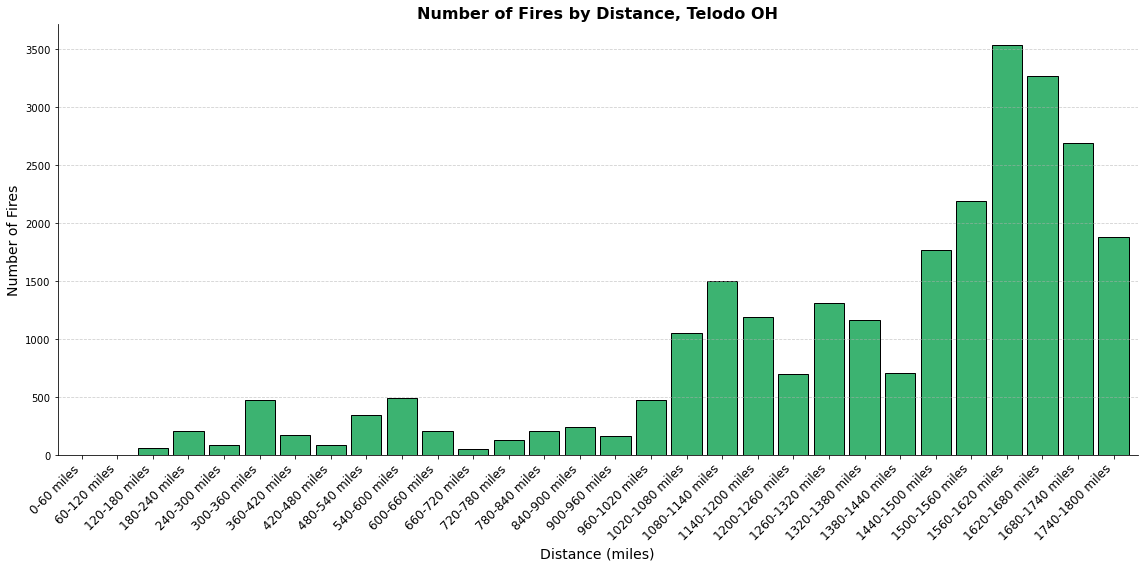

In [93]:
import matplotlib.pyplot as plt

# Create bins for distances
bins = range(0, 1850, 60)

# Count the number of fires in each bin, sort by distance
distance_counts = pd.cut(df_within_1800['shortest_distance_to_telodo'], bins).value_counts().sort_index()

# Plot the graph
plt.figure(figsize=(16, 8))
distance_counts.plot(kind='bar', color='mediumseagreen', width=0.85, edgecolor='black')

# Enhance the appearance
plt.title('Number of Fires by Distance, Telodo OH', fontsize=16, fontweight='bold')
plt.xlabel('Distance (miles)', fontsize=14)
plt.ylabel('Number of Fires', fontsize=14)

# Update x-axis labels with distances in miles
xtick_labels = [f"{interval.left}-{interval.right} miles" for interval in distance_counts.index]
plt.xticks(ticks=range(len(xtick_labels)), labels=xtick_labels, rotation=45, ha='right', fontsize=12)

# Customize grid and remove top/right spines for a cleaner look
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Save and show the plot
plt.tight_layout()
plt.savefig('Number_of_Fires_by_Distance_from_toledo_improved.png', dpi=300, bbox_inches='tight')
plt.show()


## Graph 2. Time series graph of total acres burned per year

Produce a time series graph of total acres burned per year for the fires occurring in the specified distance from Telodo OH.

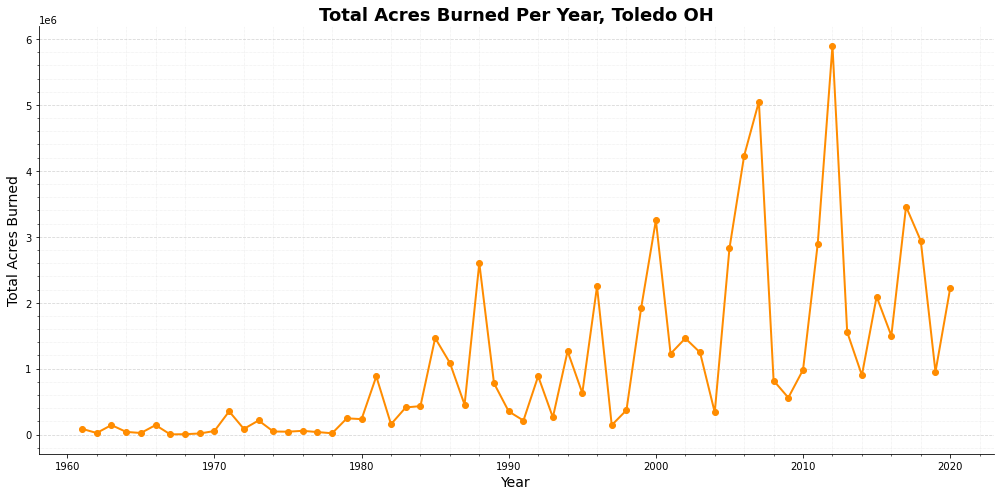

In [103]:
import matplotlib.pyplot as plt

# Group by year and sum the acres burned
acres_burned_per_year = df_within_1800.groupby('attributes_Fire_Year')['attributes_GIS_Acres'].sum()

# Plot the graph
plt.figure(figsize=(14, 7))
acres_burned_per_year.plot(kind='line', marker='o', linestyle='-', color='darkorange', linewidth=2, markersize=6)

# Enhance the appearance
plt.title('Total Acres Burned Per Year, Toledo OH', fontsize=18, fontweight='bold')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Total Acres Burned', fontsize=14)

# Customize grid
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Add minor grid lines for better reference
plt.minorticks_on()
plt.grid(which='minor', color='gray', linestyle=':', linewidth=0.5, alpha=0.3)

# Remove top and right spines for a cleaner look
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Adjust the layout and save the plot
plt.tight_layout()
plt.savefig('Improved_Total_Acres_Burned_Per_Year.png', dpi=300, bbox_inches='tight')
plt.show()


### Graph 3. Time series graph - Fire Smoke Impact vs. AQI (from 1999 - 2020) in the City of Toledo OH

This graphic containing your fire smoke estimates for your city and the AQI estimates for your city. Since the aqi_data only contains aqi from 1999 to 2021, I create a subset for the smoke impact dataframe as well. Recall that df_smoke_impact_by_year dataset doesn't have entries for year 2021, the graph will then only consider from year 1999 to 2020.

In [105]:
# Create a subset for df_smoke_impact_by_year
df_smoke_impact_by_year_subset = df_smoke_impact_by_year[
    (df_smoke_impact_by_year['attributes_Fire_Year'] >= 1999) &
    (df_smoke_impact_by_year['attributes_Fire_Year'] <= 2020)
]

# Initialize lists for aqi data
aqi_years = []
aqi_values = []

for year in range(1999, 2021):
    if year in aqi_data:
        aqi_df = aqi_data[year]
        aqi_years.append(year)
        aqi_values.append(aqi_df['arithmetic_mean'].mean())

# Create a DataFrame for AQI
df_aqi = pd.DataFrame({'Year': aqi_years, 'AQI': aqi_values})

# Merge smoke impact data with AQI data
df_combined = pd.merge(df_smoke_impact_by_year_subset, df_aqi, left_on='attributes_Fire_Year', right_on='Year')


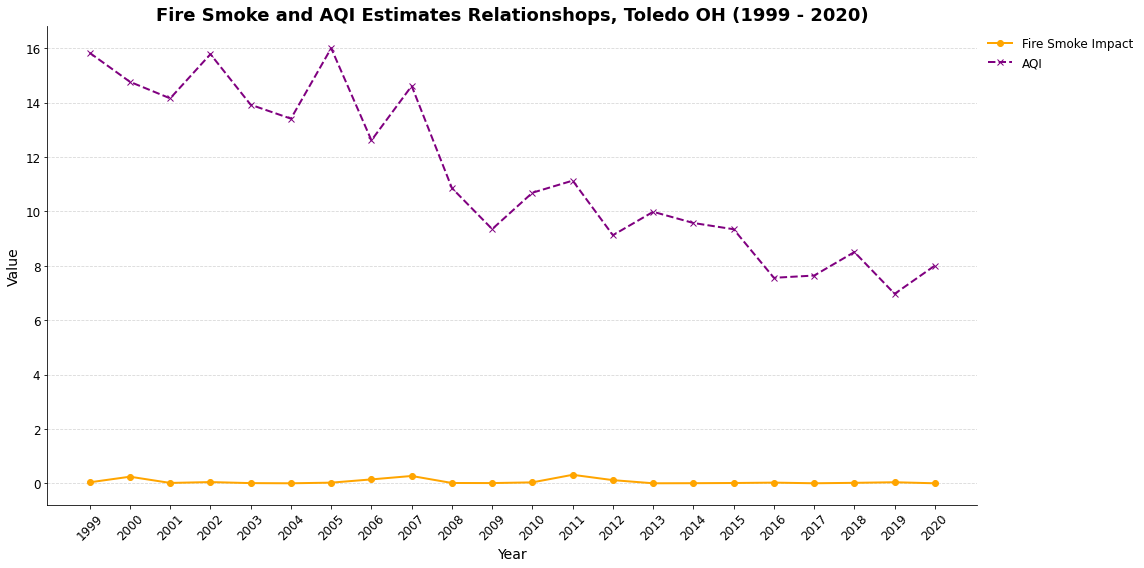

In [110]:
import matplotlib.pyplot as plt

# Plot the graph for fire smoke estimates and the AQI estimates
plt.figure(figsize=(16, 8))
plt.plot(df_combined['attributes_Fire_Year'], df_combined['impact'], label='Fire Smoke Impact', color='orange', marker='o', linestyle='-', linewidth=2, markersize=6)
plt.plot(df_combined['Year'], df_combined['AQI'], label='AQI', color='purple', marker='x', linestyle='--', linewidth=2, markersize=6)

# Enhance the appearance
plt.title('Fire Smoke and AQI Estimates Relationshops, Toledo OH (1999 - 2020)', fontsize=18, fontweight='bold')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Value', fontsize=14)

# Customizing x-ticks for better spacing and visibility
plt.xticks(df_combined['attributes_Fire_Year'], rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Adjust legend placement to be outside the plot
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=12, frameon=False)

# Customizing the grid
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Removing top and right spines for a clean look
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Adjusting the layout and saving the plot
plt.tight_layout()
plt.savefig('Improved_Fire_Smoke_Impact_vs_AQI.png', dpi=300, bbox_inches='tight')
plt.show()
